## Data Preprocessing
데이터 전처리란 데이터 분석(모델링) 방향에 맞도록 데이터를 정제하는 작업을 의미합니다.<br>
실제 데이터 분석에서 70% 이상을 차지하기도 합니다.<br>
앞서 EDA를 통해 살펴본 내용을 바탕으로 간단한 데이터 전처리를 진행한 뒤 모델링까지 해보도록 하겠습니다.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('./data/titanic.csv')
test_df = pd.read_csv('./data/test.csv')

### null  값 제거

In [18]:
# null 값 제거
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
# Age
train_df.groupby(['Sex', 'Pclass'])['Age']

In [21]:
print(train_df.groupby(['Sex', 'Pclass'])['Age'].median())

# df['Age']의 널 값에 중간값을 저장
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [22]:
# Cabin
train_df['Cabin']

# 복잡하므로 사용 x

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [23]:
# Embarked
train_df['Embarked'] = train_df['Embarked'].fillna('S')
print(train_df['Embarked'].isnull().sum())

test_df['Embarked'] = test_df['Embarked'].fillna('S')
print(test_df['Embarked'].isnull().sum())

0
0


In [24]:
# Fare
test_df['Fare'] = test_df.groupby(['Sex', 'Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

In [25]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### Ont-Hot_Encoding
범주형 변수를 숫자로 바꿔서 모델링에 사용하는 방법

In [26]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [27]:
# Sex와 Embarked 사용
cate_col = []
for i in [4, 11]:
    cate_col.append(train_df.columns[i])

# ont-hot-encoding 사용
train_cate_df = pd.get_dummies(train_df.loc[:,(cate_col)], drop_first = True)
test_cate_df = pd.get_dummies(test_df.loc[:,(cate_col)], drop_first = True)
train_cate_df

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [28]:
# 데이터 프레임 결합
train_df = pd.concat(objs = [train_df, train_cate_df], axis = 1).reset_index(drop = True)
test_df = pd.concat(objs = [test_df, test_cate_df], axis = 1).reset_index(drop = True)

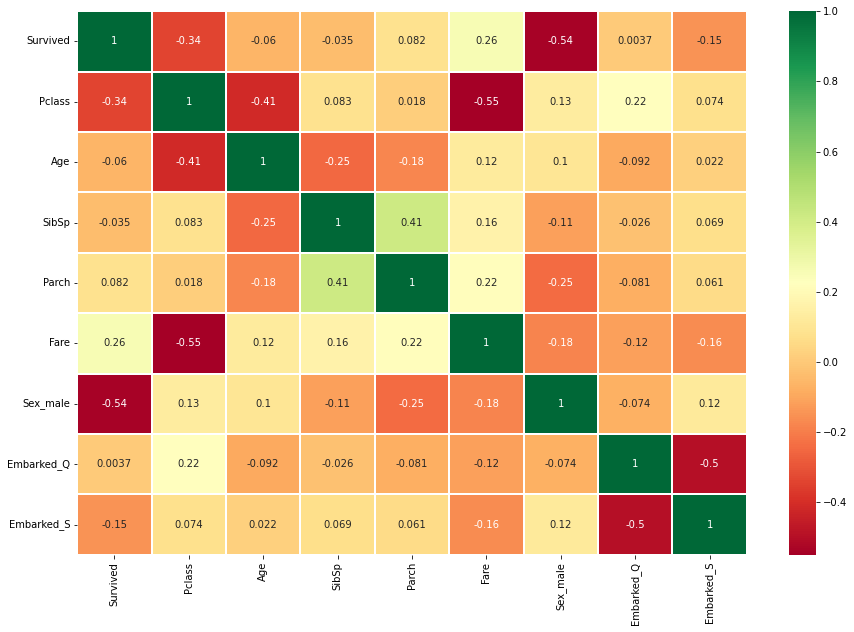

In [29]:
sns.heatmap(train_df.drop(['PassengerId'], axis = 1).corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

### Modeling
실제 데이터를 머신러닝을 통해 학습시켜 모델을 만드는 과정입니다.<br>
이번 실습에서는 간단하게 의사결정나무로 모델링을 하는 것을 실습하겠습니다.


In [14]:
!pip install pydotplus

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
X_data = train_df.drop(["Name", "Sex", "Ticket", "Cabin", 'Embarked', 'Survived'], axis=1)
y_data = train_df[['Survived']]
test_df = test_df.drop(["Name", "Sex", "Ticket", "Cabin", 'Embarked'], axis=1)
tree = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 4,
                             random_state = 1)
tree.fit(X_data, y_data)
test_df['Survived'] = tree.predict(test_df)

In [31]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1,0
414,1306,1,39.0,0,0,108.9000,0,0,0,1
415,1307,3,38.5,0,0,7.2500,1,0,1,0
416,1308,3,24.0,0,0,8.0500,1,0,1,0
